In [1]:
import torch
from torchvision.io import read_image

from functions import *

In [2]:
working_directory_path: str = os.getcwd()
images_path: str = working_directory_path + '/images'

dataset: list = load_dataset(images_path, added_new_images = False) # added_new_images = True solo quando vengono aggiunte nuove immagini al path.

In [3]:
model: torchvision.models = load_model_resnet50().to(settings.device)

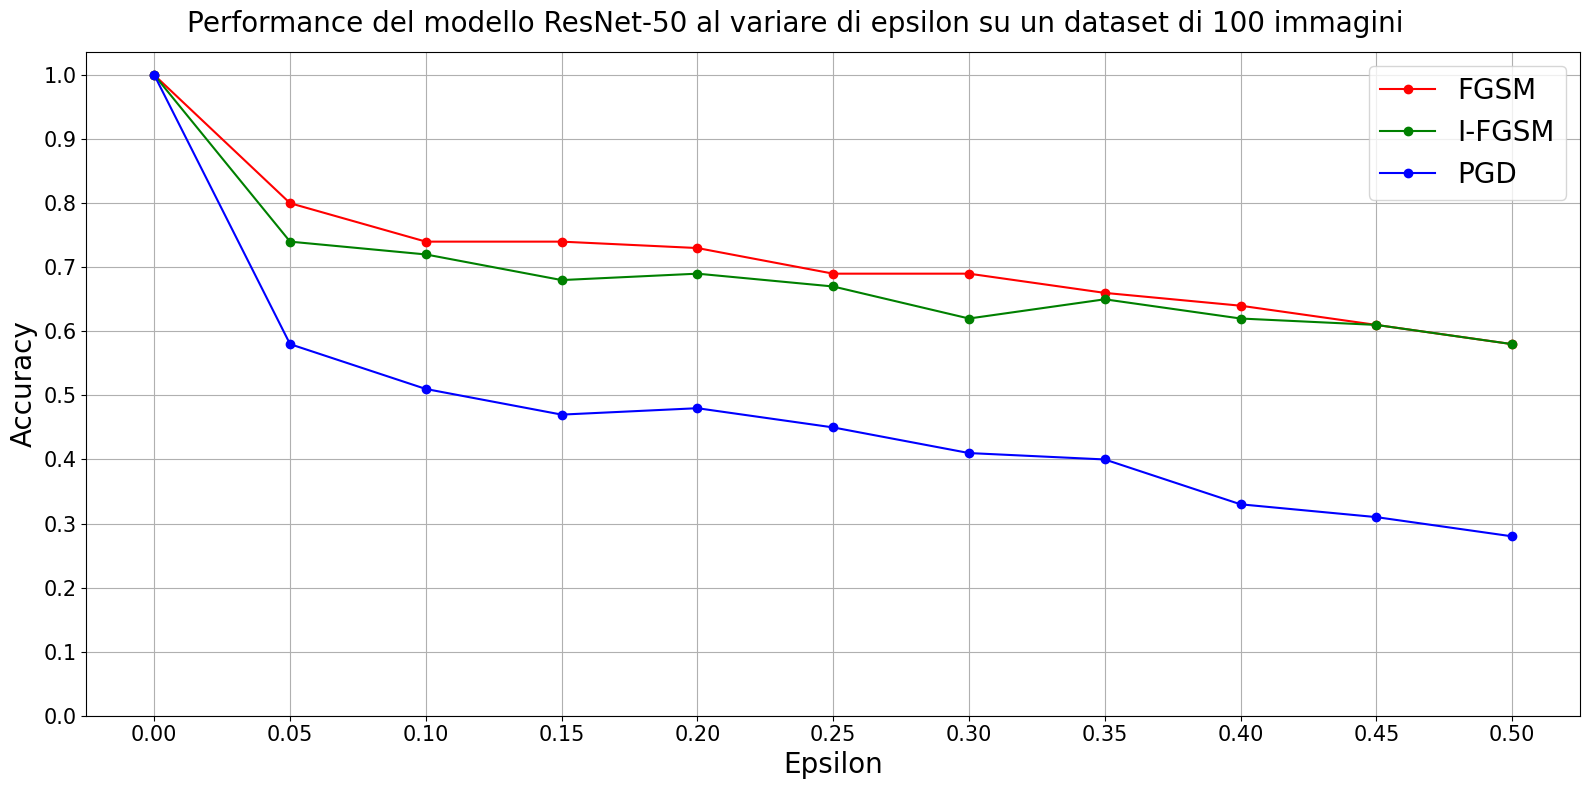

In [4]:
results_path: str = working_directory_path + '/res'

epsilons: list = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
iters: int = 100
alphas: list = [elem/iters for elem in epsilons]

flag_compute_performance_against_FGSM: bool = False
flag_compute_performance_against_IFGSM: bool = False
flag_compute_performance_against_PGD: bool = False

attack_type: tuple = (1, 2, 3) # 1: FGSM, 2: IFGSM, 3: PGD.

if flag_compute_performance_against_FGSM: # Tempo richiesto: 2 minuti
    fgsm_accuracies, fgsm_dict_wrong_preds = compute_accuracy(attack_type[0], dataset, model, settings.device, settings.img_resize, epsilons, alphas)
    file_name = os.path.join(results_path, 'fgsm_accuracies.txt')
    with open(file_name, 'w') as file:
        for i, elem in enumerate(fgsm_accuracies):
            string_to_write: str = ''
            if i < len(epsilons) - 1:
                string_to_write = str(elem) + '\n'
            else:
                string_to_write = str(elem)
            #file.write(string_to_write) # Riga commentata per sicurezza
    #torch.save(fgsm_dict_wrong_preds, 'res/fgsm_dict_wrong_preds.pth') # Riga commentata per sicurezza

if flag_compute_performance_against_IFGSM: # Tempo richiesto: 64 minuti
    ifgsm_accuracies, ifgsm_dict_wrong_preds = compute_accuracy(attack_type[1], dataset, model, settings.device, settings.img_resize, epsilons, alphas, iters)
    file_name = os.path.join(results_path, 'ifgsm_accuracies.txt')
    with open(file_name, 'w') as file:
        for i, elem in enumerate(ifgsm_accuracies):
            string_to_write: str = ''
            if i < len(epsilons) - 1:
                string_to_write = str(elem) + '\n'
            else:
                string_to_write = str(elem)
            #file.write(string_to_write) # Riga commentata per sicurezza
    #torch.save(ifgsm_dict_wrong_preds, 'res/ifgsm_dict_wrong_preds.pth') # Riga commentata per sicurezza

if flag_compute_performance_against_PGD: # Tempo richiesto: 64 minuti
    pgd_accuracies, pgd_dict_wrong_preds = compute_accuracy(attack_type[2], dataset, model, settings.device, settings.img_resize, epsilons, alphas, iters)
    file_name = os.path.join(results_path, 'pgd_accuracies.txt')
    with open(file_name, 'w') as file:
        for i, elem in enumerate(pgd_accuracies):
            string_to_write: str = ''
            if i < len(epsilons) - 1:
                string_to_write = str(elem) + '\n'
            else:
                string_to_write = str(elem)
            #file.write(string_to_write) # Riga commentata per sicurezza
    #torch.save(pgd_dict_wrong_preds, 'res/pgd_dict_wrong_preds.pth') # Riga commentata per sicurezza

fgsm_accuracies: list = np.loadtxt('res/fgsm_accuracies.txt', delimiter = ' ').tolist()
ifgsm_accuracies: list = np.loadtxt('res/ifgsm_accuracies.txt', delimiter = ' ').tolist()
pgd_accuracies: list = np.loadtxt('res/pgd_accuracies.txt', delimiter = ' ').tolist()
accuracies: tuple = (fgsm_accuracies, ifgsm_accuracies, pgd_accuracies)

fgsm_dict_wrong_preds: dict = torch.load('res/fgsm_dict_wrong_preds.pth')
ifgsm_dict_wrong_preds: dict = torch.load('res/ifgsm_dict_wrong_preds.pth')
pgd_dict_wrong_preds: dict = torch.load('res/pgd_dict_wrong_preds.pth')
wrong_preds: tuple = (fgsm_dict_wrong_preds, ifgsm_dict_wrong_preds, pgd_dict_wrong_preds)

dict_show_wrong_preds: dict = {
    'show_FGSM_wrong_preds': False,
    'show_IFGSM_wrong_preds': False,
    'show_PGD_wrong_preds': False
}

accuracy_display(dataset, model, epsilons, accuracies, wrong_preds, dict_show_wrong_preds)